In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Download Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# PreProcessing Data
One-hot encoded labels will be constructed

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
y_onehot_train = to_categorical(y_train,10)
y_onehot_test = to_categorical(y_test,10)

# Normalization

In [5]:
x_train = x_train/255
x_test = x_test/255

# Reshape Data
Adding depth of 1.

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Training

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [8]:
model = Sequential()

model.add(Conv2D(filters=4, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=8, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 8)           808       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [12]:
model.fit(x_train,y_onehot_train,epochs=10,validation_data=(x_test,y_onehot_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.5952 - accuracy: 0.8188 - val_loss: 0.1835 - val_accuracy: 0.9415
Epoch 2/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.1598 - accuracy: 0.9526 - val_loss: 0.1094 - val_accuracy: 0.9661
Epoch 3/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1159 - accuracy: 0.9645 - val_loss: 0.0872 - val_accuracy: 0.9718
Epoch 4/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0957 - accuracy: 0.9705 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 5/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.0767 - val_accuracy: 0.9766
Epoch 6/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0730 - accuracy: 0.9775 - val_loss: 0.0644 - val_accuracy: 0.9807
Epoch 7/10
60000/60000 [======================

In [13]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.595216,0.818850,0.183486,0.9415
1,0.159791,0.952567,0.109385,0.9661
2,0.115857,0.964533,0.087180,0.9718
3,0.095733,0.970533,0.078878,0.9756
4,0.082069,0.974867,0.076656,0.9766


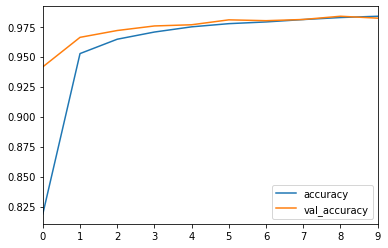

In [14]:
losses[['accuracy','val_accuracy']].plot()

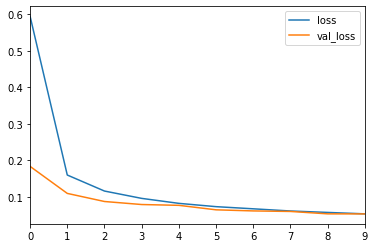

In [15]:
losses[['loss','val_loss']].plot()

In [16]:
my_number = x_test[0]

In [17]:
print(model.metrics_names)
print(model.evaluate(x_test,y_onehot_test,verbose=0))

['loss', 'accuracy']
[0.05313334116267506, 0.9821]


In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
predictions = model.predict_classes(x_test)

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



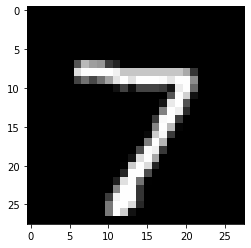

In [24]:
my_number = x_test[0]
my_number = np.array(my_number, dtype='float')
pixels = my_number.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [25]:
my_number = x_test[0]
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)